<a href="https://colab.research.google.com/github/geunsu-jo/Hands-On-ML/blob/main/textbook_practice/11_training_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 그레디언트 소실과 폭주 문제

1 가중치 초기화 방법에 문제 <br>
- 평균이 0이고 표준편차가 1인 정규분포로부터 초기 가중치를 구했는데 이를 로지스틱 활성화 함수와 같이 사용할 경우, 출력의 분산이 입력의 분산보다 커져서, 가장 높은 층(마지막 층)에서 활성화 함수가 0이나 1로 수렴
- 로지스틱 함수의 평균이 0.5이다. 반면 tanh함수는 평균이 0이므로, 가중치 초기화를 정규분포로 사용했을 때 로지스틱 함수보다 조금 더 나은 성능을 보임


2 활성화 함수 선택의 문제 <br>
- 활성화 함수로 로지스틱함수를 사용할 경우, 양 극값에서 미분계수가 0으로 수렴함에 따라 가중치 업데이트가 불가능하게 됨

In [1]:
def logit(z):
    return 1 / (1 + np.exp(-z))

(-5.0, 5.0, -0.2, 1.2)

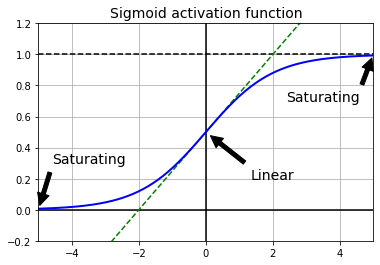

In [2]:
import matplotlib.pyplot as plt
import numpy as np

z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

### 글로럿(Xavier)초기화와 He 초기화

저자들은 적절한 신호가 흐르기위해 각 층의 입,출력 분산이 동일해야 한다고 본단다.

|초기화 전략|활성화 함수| $\sigma^2$(정규분포) |
|---|---|---|
|글로럿|활성화 함수 없음(tanh, logistic, softmax)|$\frac{1}{fan_{avg}}$|
|He|ReLU함수와 그 변종들|$\frac{2}{fan_{in}}$|
|르쿤|SELU|$\frac{1}{fan_{in}}$|

- fan-in과 fan-out은 입력과 출력의 연결 개수
- fan-avg = (fan-in + fan-out)/2

In [3]:
import keras
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [4]:
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

균등분포 He 초기화를 사용한다면, 다음과 같이 __VarianceScaling__사용 가능(variance transformation인듯)

In [5]:
init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg',
                                          distribution='uniform')
keras.layers.Dense(10, activation="relu", kernel_initializer=init)

### 수렴하지 않는 활성화 함수

#### __LeakyReLU__

- ReLU 함수의 경우 양수값에서 수렴하지 않는다는 큰 장점을 가지지만 dying ReLU 문제가 있음 <br>
- 이를 해결하기 위해 활성화 함수에서 z<0일 때 기울기를 부여하여, 죽은 뉴런의 깨어날 가능성을 줄 수 있다. <br>
- $LeakyReLu_{\alpha}(z)=max(\alpha z, z)$ <br>
- 일반적으로 $\alpha=0.01$를 많이 사용

<function matplotlib.pyplot.show>

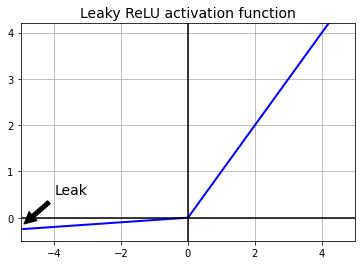

In [6]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])
plt.show

In [7]:
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'tanh']

In [8]:
[m for m in dir(keras.layers) if "relu" in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

LeakyReLU를 사용해 패션 MNIST 신경망 훈련

In [9]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

4423680/4422102 [==============================] - 0s 0us/step


In [10]:
import tensorflow as tf
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [11]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [12]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 1.6314 - accuracy: 0.5054 - val_loss: 0.8886 - val_accuracy: 0.7160
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8416 - accuracy: 0.7247 - val_loss: 0.7130 - val_accuracy: 0.7656
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7053 - accuracy: 0.7637 - val_loss: 0.6427 - val_accuracy: 0.7898
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6325 - accuracy: 0.7908 - val_loss: 0.5900 - val_accuracy: 0.8066
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5992 - accuracy: 0.8021 - val_loss: 0.5582 - val_accuracy: 0.8200
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5624 - accuracy: 0.8142 - val_loss: 0.5350 - val_accuracy: 0.8236
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5379 - accuracy: 0.8218 - val_loss: 0.5157 - val_accuracy:

#### __RReLU__와 __PReLU__

- RReLU(Randomized leaky ReLU) : $\alpha$를 무작위 선택하고 테스트시에는 평균을 사용(랜포에서 과적합을 줄이기위한 투표형식과 유사한듯)
PReLU(Parametric leaky ReLU) : $\alpha$를 학습 과정에 포함(즉, Hyperparameter가 아니라 모델 내의 가중치같은 파라미터)

PReLU 사용해보자(RReLU는 아직 없다)

In [30]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [31]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_215 (Dense)            (None, 300)               235500    
_________________________________________________________________
p_re_lu_2 (PReLU)            (None, 300)               300       
_________________________________________________________________
dense_216 (Dense)            (None, 100)               30100     
_________________________________________________________________
p_re_lu_3 (PReLU)            (None, 100)               100       
_________________________________________________________________
dense_217 (Dense)            (None, 10)                1010      
Total params: 267,010
Trainable params: 267,010
Non-trainable params: 0
________________________________________________

In [14]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 1.6969 - accuracy: 0.4974 - val_loss: 0.9255 - val_accuracy: 0.7186
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8706 - accuracy: 0.7247 - val_loss: 0.7305 - val_accuracy: 0.7630
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7211 - accuracy: 0.7619 - val_loss: 0.6565 - val_accuracy: 0.7878
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6448 - accuracy: 0.7881 - val_loss: 0.6003 - val_accuracy: 0.8046
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6078 - accuracy: 0.8004 - val_loss: 0.5656 - val_accuracy: 0.8182
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5693 - accuracy: 0.8119 - val_loss: 0.5406 - val_accuracy: 0.8238
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5428 - accuracy: 0.8194 - val_loss: 0.5196 - val_accuracy:

#### __ELU 함수__

2015년에 등장한 활성화 함수로, 다른 모든 ReLU 변종의 성능을 앞질럿음

$
ELU_{\alpha}(z) =
\begin{cases}
  \alpha(exp(z)-1) &  z<0 \\
  z & z>0
\end{cases}
$

In [15]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

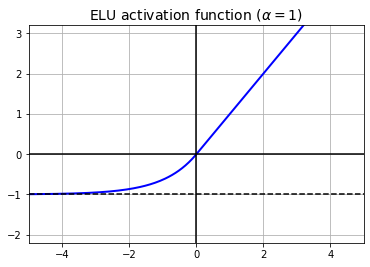

In [16]:
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

- z<0 이어도 죽은 뉴런을 만들지 않음
- 모든 구간에서 미분 가능하므로(매끄러우므로) 경사하강법의 속도를 높여줌
- 지수 함수를 사용하기에 계산 속도는 상대적으로 느림

텐서플로에서 쉽게 ELU적용 가능

In [17]:
keras.layers.Dense(10, activation="elu")

#### __SeLU__ 함수

- 완전 연결 층만 쌓아서 신경망을 만들고 모든 은닉층이 SELU활성화 함수 사용, 르쿤 초기화를 사용한다면 자기 정규화(self-normalize)된다.
- 훈련하는 동안 각 층의 출력의 평균은 0, 표준편차는 1로 유지하는 경향을 가짐
- 이는 그레디언트 소실과 폭주 문제를 해결함으로써 더 좋은 성능을 내기도 함
- 완전 연결 층일 때만, 자기 정규화가 보장되기 때문에, 10장에서 다뤗던 와이드 &딥 연결 혹은 순환신경망에서는 자기 정규화가 보장되지 않는다. 따라서 SELU가 다른 활성화 함수보다 성능이 뛰어나지 않을 수도 있다.

In [18]:
from scipy.special import erfc

# alpha와 scale은 평균 0과 표준 편차 1로 자기 정규화합니다

# 논문에 있는 식으로 그냥 넘어가자
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)


In [19]:
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

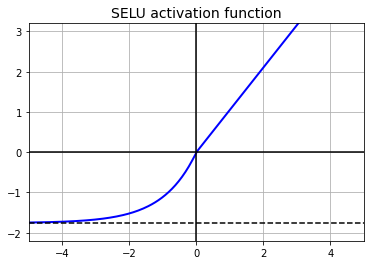

In [20]:
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

다음과 같이 1,000개의 층이 있는 심층 신경망도 모든 층에 걸쳐 평균이 0이고 표준 편차를 1로 유지한다.

In [21]:
np.random.seed(42)
Z = np.random.normal(size=(500, 100)) # 표준화된 입력
for layer in range(1000):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1 / 100)) # LeCun 초기화
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()
    if layer % 100 == 0:
        print("Layer {}: mean {:.2f}, std deviation {:.2f}".format(layer, means, stds))

Layer 0: mean -0.00, std deviation 1.00
Layer 100: mean 0.02, std deviation 0.96
Layer 200: mean 0.01, std deviation 0.90
Layer 300: mean -0.02, std deviation 0.92
Layer 400: mean 0.05, std deviation 0.89
Layer 500: mean 0.01, std deviation 0.93
Layer 600: mean 0.02, std deviation 0.92
Layer 700: mean -0.02, std deviation 0.90
Layer 800: mean 0.05, std deviation 0.83
Layer 900: mean 0.02, std deviation 1.00


다음과 같이 쉽게 selu 적용 가능(반드시 르쿤 초기화 사용하자)

In [22]:
keras.layers.Dense(10, activation="selu",
                   kernel_initializer="lecun_normal")

SeLU 함수를 사용한 패션 MNIST 신경망 만들기

In [23]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [24]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

스케일링은 반드시 표준화를 사용할 것(평균0 분산1)

In [25]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [26]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 28s 15ms/step - loss: 1.5209 - accuracy: 0.4215 - val_loss: 0.7740 - val_accuracy: 0.7202
Epoch 2/5
1719/1719 [==============================] - 25s 14ms/step - loss: 0.7296 - accuracy: 0.7329 - val_loss: 0.7412 - val_accuracy: 0.7446
Epoch 3/5
1719/1719 [==============================] - 25s 14ms/step - loss: 0.6112 - accuracy: 0.7804 - val_loss: 0.5556 - val_accuracy: 0.8030
Epoch 4/5
1719/1719 [==============================] - 25s 14ms/step - loss: 0.5495 - accuracy: 0.8073 - val_loss: 0.5219 - val_accuracy: 0.8130
Epoch 5/5
1719/1719 [==============================] - 25s 14ms/step - loss: 0.5205 - accuracy: 0.8215 - val_loss: 0.4657 - val_accuracy: 0.8412


Relu를 사용했을 때와 비교

In [27]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 25s 13ms/step - loss: 2.0619 - accuracy: 0.1858 - val_loss: 1.7172 - val_accuracy: 0.3566
Epoch 2/5
1719/1719 [==============================] - 22s 13ms/step - loss: 1.2170 - accuracy: 0.4840 - val_loss: 0.9678 - val_accuracy: 0.5622
Epoch 3/5
1719/1719 [==============================] - 23s 13ms/step - loss: 1.0483 - accuracy: 0.5694 - val_loss: 0.9552 - val_accuracy: 0.6096
Epoch 4/5
1719/1719 [==============================] - 22s 13ms/step - loss: 0.8951 - accuracy: 0.6481 - val_loss: 0.7766 - val_accuracy: 0.7068
Epoch 5/5
1719/1719 [==============================] - 22s 13ms/step - loss: 0.7726 - accuracy: 0.7072 - val_loss: 0.6867 - val_accuracy: 0.7444


### 배치 정규화

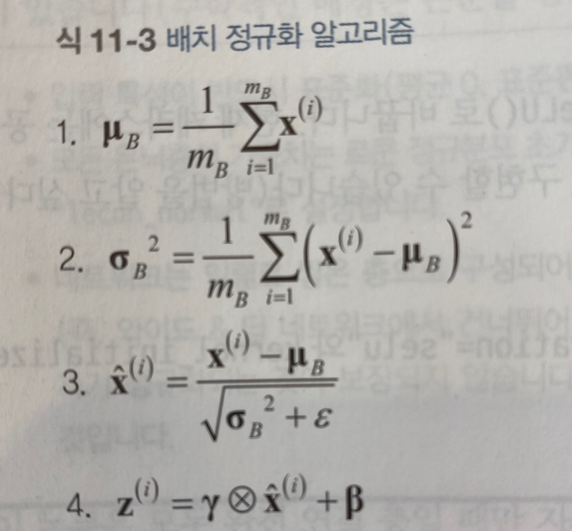


$\mu_{B}$ : 미니배치B에 대한 입력 평균 벡터, $\sigma_{B}$ : 미니배치 B에 대한 입력 표준편차 <br> 
$\gamma$ : 출력 스케일 벡터, $\beta$ : 출력 이동 벡터 <br>
$\mu$ : 최종 입력 평균 벡터, $\sigma$ : 최종 입력 표준 편차 <br>
최종 입력 평균 벡터와 표준 편차는 훈련하는 동안 이동 평균(moving average)를 사용해 추정함

In [32]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [33]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 784)               3136      
_________________________________________________________________
dense_218 (Dense)            (None, 300)               235500    
_________________________________________________________________
batch_normalization_4 (Batch (None, 300)               1200      
_________________________________________________________________
dense_219 (Dense)            (None, 100)               30100     
_________________________________________________________________
batch_normalization_5 (Batch (None, 100)               400       
_________________________________________________________________
dense_220 (Dense)            (None, 10)               

- 배치 정규화 층에서 4개의 파라미터 $\gamma,\beta,\mu,\sigma$를 추가함 (즉, 첫번째 배치 정규화 층은 4x784=3136개의 파라미터)
- 여기서 $\mu, \sigma$는 이동 평균을 사용하면서, 역전파로 학습되지 않기 때문에 'Non-trainable params'으로 분류
- 따라서 총 Non-trainable params 의 수는 (3136+1200+400)/2 = 2368

첫 번째 배치 정규화 층의 파라미터를 살펴보면 다음과 같다.

In [39]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization_3/gamma:0', True),
 ('batch_normalization_3/beta:0', True),
 ('batch_normalization_3/moving_mean:0', False),
 ('batch_normalization_3/moving_variance:0', False)]

BatchNormalization 층이 이를 무효화하기 때문에 BatchNormalization 층 이전의 층은 편향을 위한 항이 필요 없다. 따라서 필요 없는 파라미터이므로 __use_bias=False__를 지정하여 층을 만든다.

In [42]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [43]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 9s 5ms/step - loss: 1.3856 - accuracy: 0.5573 - val_loss: 0.6611 - val_accuracy: 0.7864
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.6956 - accuracy: 0.7784 - val_loss: 0.5478 - val_accuracy: 0.8196
Epoch 3/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.6016 - accuracy: 0.8006 - val_loss: 0.4968 - val_accuracy: 0.8336
Epoch 4/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5469 - accuracy: 0.8162 - val_loss: 0.4662 - val_accuracy: 0.8418
Epoch 5/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5213 - accuracy: 0.8205 - val_loss: 0.4438 - val_accuracy: 0.8498
Epoch 6/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4884 - accuracy: 0.8309 - val_loss: 0.4278 - val_accuracy: 0.8532
Epoch 7/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4733 - accuracy: 0.8362 - val_loss: 0.4141 - val_accuracy:

### 그레디언트 클리핑

역전파될 때 일정 임계값을 넘지 못해가 그레디언트를 잘라내는 방법. <br>
순환 신경망의 경우 배치 정규화를 적용하기 어려워서 이 방법을 많이 사용한다.(다른 종류의 네트워크는 배치 정규화면 충분하다고 함)

__clipvalue__를 사용한 클리핑 <br>
예를 들어 clipvalue=1.0이고 그레디언트 벡터가 (0.9, 100)인 경우 (0.9, 1)로 만듬

In [48]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)

__clipnorm__을 사용한 클리핑 <br>
예를 들어 clipnorm=1.0 이고 그레디언트 벡터가 (0.9, 100)인 경우 (000899964.0.9999595)로 만듬

In [49]:
optimizer = keras.optimizers.SGD(clipnorm=1.0)

## 사전 훈련된 층 재사용하기

생략

## 고속 옵티마이저

### __모멘텀 최적화__

In [50]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9)

### __AdaGrad__

In [51]:
optimizer = keras.optimizers.Adagrad(lr=0.001)

### __RMSProp__

In [52]:
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9)

### __Adam 옵티마이저__

In [53]:
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

### __Adamax 옵티마이저__

In [54]:
optimizer = keras.optimizers.Adamax(lr=0.001, beta_1=0.9, beta_2=0.999)

### __Nadam 옵티마이저__

In [55]:
optimizer = keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999)

## 학습률 스케줄링

- 학습하는 동안 학습률을 감소시키는 전략


### __거듭제곱 기반 스케줄링__

lr = lr0 / (1 + steps / s)**c <br>
케라스는 c=1과 s = 1 / decay을 사용

In [56]:
optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-4)

In [57]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [58]:
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6037 - accuracy: 0.7890 - val_loss: 0.4025 - val_accuracy: 0.8598
Epoch 2/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3882 - accuracy: 0.8625 - val_loss: 0.3720 - val_accuracy: 0.8718
Epoch 3/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3530 - accuracy: 0.8766 - val_loss: 0.3705 - val_accuracy: 0.8698
Epoch 4/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3318 - accuracy: 0.8814 - val_loss: 0.3479 - val_accuracy: 0.8784
Epoch 5/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3208 - accuracy: 0.8854 - val_loss: 0.3420 - val_accuracy: 0.8770
Epoch 6/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2956 - accuracy: 0.8943 - val_loss: 0.3404 - val_accuracy: 0.8826
Epoch 7/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2909 - accuracy: 0.8972 - val_loss: 0.3348 - val_accuracy:

__학습률 시각화__

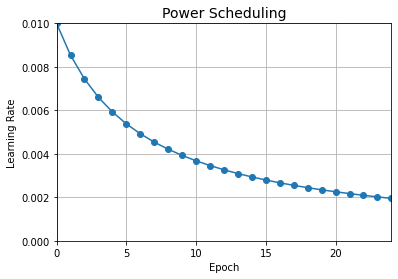

In [59]:
learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = len(X_train) // batch_size
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

### 지수 기반 스케줄링

lr = lr0 * 0.1**(epoch / s)

In [60]:
# eta와 s는 하드코딩
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)


In [61]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [63]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25

__LearningRateScheduler__ 콜백을 만들고 __fit()__ 메서드에 전달

In [64]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 10s 5ms/step - loss: 1.0979 - accuracy: 0.7331 - val_loss: 0.9395 - val_accuracy: 0.6994
Epoch 2/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.8030 - accuracy: 0.7674 - val_loss: 0.6111 - val_accuracy: 0.8294
Epoch 3/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6610 - accuracy: 0.8077 - val_loss: 0.7778 - val_accuracy: 0.7658
Epoch 4/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6482 - accuracy: 0.8182 - val_loss: 0.5523 - val_accuracy: 0.8358
Epoch 5/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5417 - accuracy: 0.8346 - val_loss: 0.5322 - val_accuracy: 0.8516
Epoch 6/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5190 - accuracy: 0.8504 - val_loss: 0.5443 - val_accuracy: 0.8674
Epoch 7/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4439 - accuracy: 0.8687 - val_loss: 0.5361 - val_accuracy

__학습률 시각화__

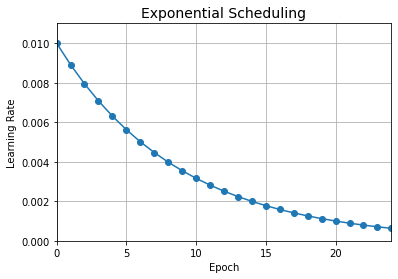

In [65]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()